# PYTHON PROGRAMMING  MINI PROJECT
Venkata Yasaswi Vempati, 2343359, 3BSc EMS <br>
Equation Solver Using SymPy

Let us first import the necessary libraries- SymPy for handling the mathematical processing of functions, Matplotlib for plotting the function, and IPyWidgets to create an intuitive, interactive interface for the user later on in the project. Further, let us also set a particular style (<i> dark_background </i>) for any plots generated by Matplotlib later in the process.

In [10]:
import sympy as sp
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import ipywidgets as widgets

The first among the functionalities we want the program to have is the ability to find the zeroes of a function, so to speak: should the function be equated to zero, what would the solutions be? We account for multiple solutions, the existence of no solution at all, and also include a provision for exception handling- syntax errors, import errors, runtime errors, etc. are caught by the exception handler and this makes it easier to catch faults in our code.

In [11]:
def solve_equation(expr):
    print("\nSolving the equation...")
    try:
        solution = sp.solve(expr, dict=True)
        if solution:
            print("Solution(s):")
            for sol in solution:
                print(sol)
        else:
            print("No solution found.")
    except Exception as e:
        print(f"Error: {e}")

We shall also now add differentiation: assuming a single variable exists in the function, we set it as "var" and find the derivative of the function. One key difference between this and the previous functionality we defined is the lack of exception handling, as we are extremely unlikely to need it in differentiation, and the existing exception handler would catch out any problems before.

In [12]:
def differentiate(expr):
    print("\nDifferentiating the function...")
    var = list(expr.free_symbols)[0]  # assume single variable
    derivative = sp.diff(expr, var)
    print("Derivative:", derivative)

Similarly, we go on to add the instructions for integration, finding critical points, and plotting the function.

In [13]:
def integrate(expr):
    print("\nIntegrating the function...")
    var = list(expr.free_symbols)[0]  # assume single variable
    integral = sp.integrate(expr, var)
    print("Integral:", integral)

In [14]:
def find_critical_points(expr):
    print("\nFinding critical points...")
    var = list(expr.free_symbols)[0]  # assume single variable
    derivative = sp.diff(expr, var)
    critical_points = sp.solve(derivative, var)
    if critical_points:
        print("Critical points:", critical_points)
    else:
        print("No critical points found.")

In [15]:
def graph_function(expr):
    print("\nGraphing the function...")
    var = list(expr.free_symbols)[0]  # assume single variable
    x_values = range(-10, 11)
    y_values = []
    for x in x_values:
        try:
            y = expr.subs(var, x)
            if y.is_real:
                y_values.append(y)
            else:
                y_values.append(None)
        except Exception as e:
            y_values.append(None)
    valid_x = [x for x, y in zip(x_values, y_values) if y is not None]
    valid_y = [y for y in y_values if y is not None]
    plt.plot(valid_x, valid_y, marker='o')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Graph of the function")
    plt.show()

We define how to check for the symmetry of the function - is it odd, even, or neither?

In [16]:
def check_symmetry(expr):
    print("\nChecking symmetry...")
    var = list(expr.free_symbols)[0]  # assume single variable
    if expr.subs(var, -var) == expr:
        print("The function is even.")
    elif expr.subs(var, -var) == -expr:
        print("The function is odd.")
    else:
        print("The function is neither even nor odd.")

Now, we take a user input and use SymPy's <i> sympify </i> function to convert into a SymPy expression.

In [17]:
user_input = input("Enter a function/equation: ")
expr = sp.sympify(user_input)
sp.pprint("Parsed equation is: ")
sp.pprint(expr)

Parsed equation is: 
2
─
x


Lastly, we use the IPyWidgets library to create a menu. We can pick any option we would like to and receive the appropriate output with respect to the function we have given as an input earlier.

Select(description='Menu:', index=6, options=('Find the zeroes', 'Differentiate', 'Integrate', 'Find critical …


Graphing the function...


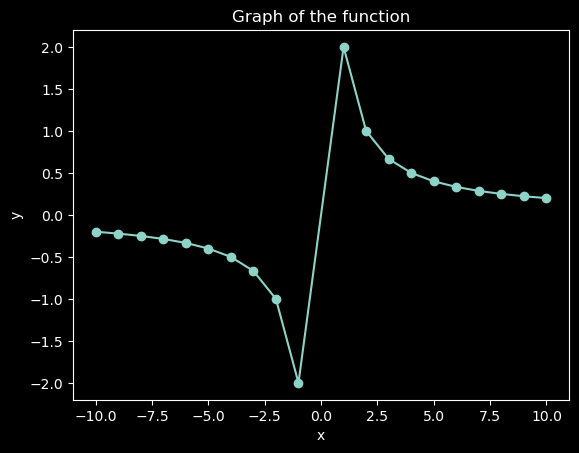

In [18]:
menu = widgets.Select(
    options=['Find the zeroes', 'Differentiate', 'Integrate', 'Find critical points', 'Check symmetry', 'Graph the function','Exit'],
    value='Exit',
    description='Menu:',
    disabled=False
)

display(menu)

def handle_menu_change(change):
    if change['new'] == 'Find the zeroes':
        solve_equation(expr)
    elif change['new'] == 'Differentiate':
        differentiate(expr)
    elif change['new'] == 'Integrate':
        integrate(expr)
    elif change['new'] == 'Find critical points':
        find_critical_points(expr)
    elif change['new'] == 'Check symmetry':
        check_symmetry(expr)
    elif change['new'] == 'Graph the function':
        graph_function(expr)
    elif change['new'] == 'Exit':
        print("The menu has been exited.")

menu.observe(handle_menu_change, names='value')